# Tugas Kecil 2
### Eksplorasi Scikit-Learn pada Jupyter Notebook

Dion Saputra 13516045 <br>
Rabbi Fijar Mayoza 13516081 <br>
K3

Import necessary library

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from subprocess import call
from IPython.display import Image

from sklearn.externals import joblib

Define helper function

In [3]:
def show_model_visualization(target,hypotesis):
    visualise_df = pd.DataFrame({'target': target,'hypotesis': hypotesis})
    lines = visualise_df.plot.line()

# show correct prediction percentage
def show_prediction_percentage(feature,label,prediction):
    print("Number of correct prediction from %d data is: %d" 
      %(feature.shape[0], (label == y_predict).sum()))
    
# show performance
def show_performance(y_test, y_predict):
    print('Accuracy score: ',round(accuracy_score(y_test, y_predict),2))
    print('Precision score: ',round(precision_score(y_test,y_predict,average="micro"),2))
    print('Recall score: ',round(precision_score(y_test,y_predict,average="micro"),2))

# show confusion matrix
def conf_matrix(y_test, y_predict):
    y_actu = pd.Series(y_test, name='Actual')
    y_pred = pd.Series(y_predict, name='Predicted')
    return pd.crosstab(y_actu, y_pred)

### A. Load Dataset 

#### A.1 Load Dataset Iris 

In [4]:
def load_dataset_iris():
    # load iris dataset from standar scikit dataset
    return datasets.load_iris()

def build_dataframe_iris(iris):
    # save feature values in pandas dataframe
    iris_feature_df = pd.DataFrame(iris.data)
    iris_feature_df.columns = iris.feature_names

    # save label values in pandas dataframe
    iris_target_df = pd.DataFrame(iris.target);
    iris_target_df.columns = ['target']
    map_target = pd.Series(iris.target_names, index=[0,1,2]);
    iris_target_df['target'] = iris_target_df['target'].map(map_target)

    # concat feature dataframe and label dataframe
    iris_df = pd.concat([iris_feature_df, iris_target_df], axis=1)
    
    return iris_df

# load dataset iris
iris = load_dataset_iris()

# show dataframe iris
iris_df = build_dataframe_iris(iris)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### A.2 Load Dataset Play-Tennis 

In [5]:
# load play-tennis dataset from external csv using pandas
def build_dataframe_tennis(tennis_file):
    tennis_df = pd.read_csv(tennis_file);
    return tennis_df

# show tennis dataframe
tennis_file = "weather.nominal.csv"
tennis_df = build_dataframe_tennis(tennis_file)
tennis_df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


### B. Full-Train Learning
<b>Full-train learning</b> merupakan metode learning dengan menggunakan keseluruhan data pada dataset sebagai data training.

#### B.1 Naive Bayes
Pada scikit-learn terdapat 4 jenis pendekatan untuk Naive Bayes, yaitu: Gaussian Naive Bayes, Multinomial Naive Bayes, Complement Naive Bayes, dan Bernoulli Naive Bayes. Training di bawah ini dilakukan untuk salah satu algoritma yang dipilih yaitu Gaussian Naive Bayes

In [6]:
# gaussian naive bayes model for iris data
gnb_ft_model = GaussianNB().fit(iris.data,iris.target)
y_predict = gnb_ft_model.predict(iris.data)

gnb_ft_model.__dict__
# show_prediction_percentage(iris.data,iris.target,y_predict)

{'class_count_': array([50., 50., 50.]),
 'class_prior_': array([0.33333333, 0.33333333, 0.33333333]),
 'classes_': array([0, 1, 2]),
 'epsilon_': 3.0955026666666677e-09,
 'priors': None,
 'sigma_': array([[0.121764, 0.140816, 0.029556, 0.010884],
        [0.261104, 0.0965  , 0.2164  , 0.038324],
        [0.396256, 0.101924, 0.298496, 0.073924]]),
 'theta_': array([[5.006, 3.428, 1.462, 0.246],
        [5.936, 2.77 , 4.26 , 1.326],
        [6.588, 2.974, 5.552, 2.026]]),
 'var_smoothing': 1e-09}

#### B.2 Decision Trees ID3

In [7]:
# decision trees id3 model for iris data
dt_ft_model = tree.DecisionTreeClassifier(criterion="entropy").fit(iris.data,iris.target)
y_predict = dt_ft_model.predict(iris.data)

dt_ft_model.__dict__
# show_prediction_percentage(iris.data,iris.target,y_predict)

{'class_weight': None,
 'classes_': array([0, 1, 2]),
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_features_': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_classes_': 3,
 'n_features_': 4,
 'n_outputs_': 1,
 'presort': False,
 'random_state': None,
 'splitter': 'best',
 'tree_': <sklearn.tree._tree.Tree at 0x1bcab010ed0>}

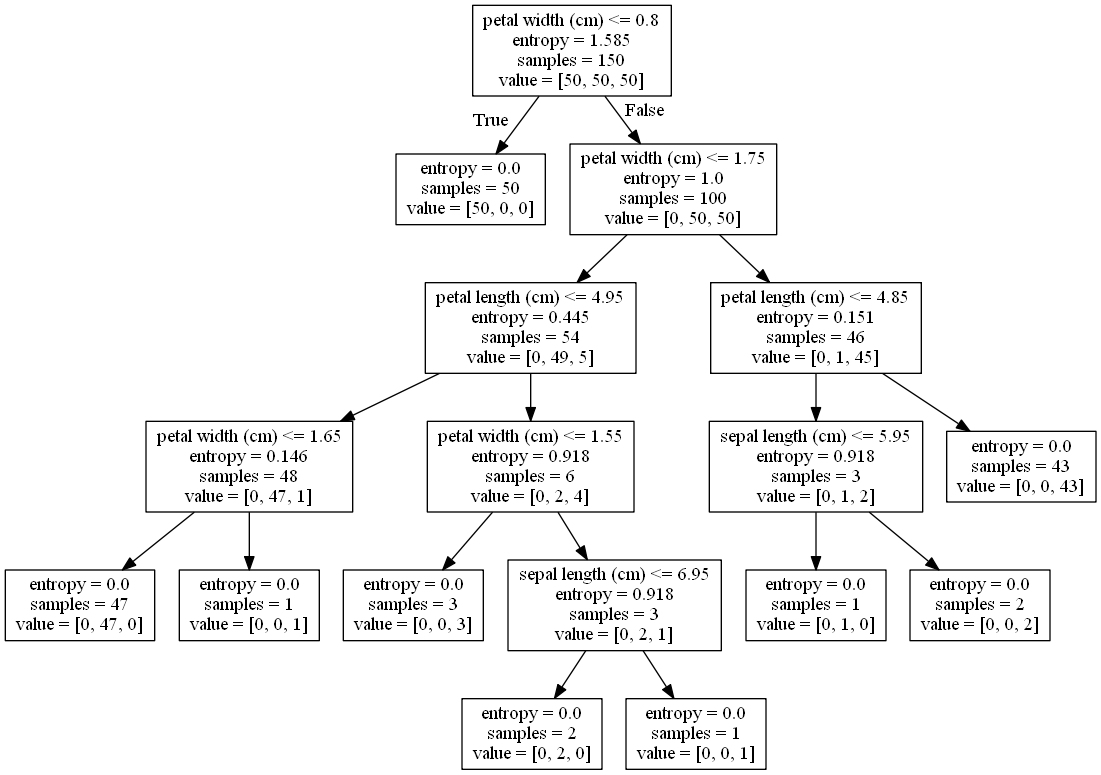

In [8]:
tree.export_graphviz(dt_ft_model, out_file='dt_ft_model.dot', feature_names=iris.feature_names)
call(['dot', '-T', 'png', 'dt_ft_model.dot', '-o', 'dt_ft_model.png'])
Image("dt_ft_model.png")

#### B.3 K-Nearest Neighbours (KNN)

In [9]:
knn_ft = KNeighborsClassifier(n_neighbors=10).fit(iris.data,iris.target)
y_predict = knn_ft.predict(iris.data)

# knn_ft.__dict__
# show_prediction_percentage(iris.data,iris.target,y_predict)

#### B.4 Multilayer Perceptron (MLP)

In [10]:
mlp_ft_model = MLPClassifier(solver='lbfgs',alpha=0.1,hidden_layer_sizes=(5, 2), random_state=1).fit(iris.data,iris.target)
y_predict = mlp_ft_model.predict(iris.data)

mlp_ft_model.__dict__
# show_prediction_percentage(iris.data,iris.target,y_predict)

{'_coef_indptr': [(0, 20, (4, 5)), (20, 30, (5, 2)), (30, 36, (2, 3))],
 '_intercept_indptr': [(36, 41), (41, 43), (43, 46)],
 '_label_binarizer': LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False),
 '_random_state': <mtrand.RandomState at 0x1bcab02c0d8>,
 'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'classes_': array([0, 1, 2]),
 'coefs_': [array([[ 0.56361127,  0.67394328,  0.7645313 , -0.1338913 ,  0.48668492],
         [ 0.47673686,  0.41092661,  0.56569944, -0.01498174,  0.72321782],
         [-0.50788084,  0.5999107 ,  0.0420123 ,  0.06797047, -0.99654574],
         [-0.71137318,  1.25403182, -0.2760552 ,  0.04045852, -0.58107476]]),
  array([[ 0.13826685,  1.55057938],
         [ 0.73017546, -0.98871516],
         [ 0.11158878,  0.48565612],
         [-0.01571834,  0.10504963],
         [ 0.10639068,  3.52022331]]),
  array([[ 0.03114319,  0.10461549, -0.1114636 ],
         [ 2.24687571,  1.36524559, -3.49013211]])],
 

### C. Split-Train Learning
<b>Split-train learning</b> merupakan metode learning dengan membagi dataset menjadi dua bagian, yaitu data training dan data test. Pada training berikut dataset akan dibagi menjadi 90% data training dan 10% data test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

#### C.1 Naive Bayes

In [12]:
# gaussian naive bayes model for iris data
gnb_st_model = GaussianNB().fit(X_train,y_train)
y_predict = gnb_st_model.predict(X_test)

show_performance(y_test,y_predict)
conf_matrix(y_test,y_predict)

Accuracy score:  0.93
Precision score:  0.93
Recall score:  0.93


Predicted,0,1,2
Actual,,,
0,9,0,0
1,0,3,0
2,0,1,2


#### C.2 Decision Trees ID3 

In [13]:
# decision trees id3 model for iris data
dt_st_model = tree.DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)
y_predict = dt_st_model.predict(X_test)

show_performance(y_test,y_predict)
conf_matrix(y_test,y_predict)

Accuracy score:  0.87
Precision score:  0.87
Recall score:  0.87


Predicted,0,1,2
Actual,,,
0,9,0,0
1,0,3,0
2,0,2,1


#### C.3 K-Nearest Neighbours (KNN) 

In [14]:
knn_st = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_predict = knn_st.predict(X_test)

show_performance(y_test,y_predict)
conf_matrix(y_test,y_predict)

Accuracy score:  0.93
Precision score:  0.93
Recall score:  0.93


Predicted,0,1,2
Actual,,,
0,9,0,0
1,0,3,0
2,0,1,2


#### C.4 Multilayer Perceptron (MLP)

In [15]:
mlp_st_model = MLPClassifier(solver='lbfgs',alpha=0.1,hidden_layer_sizes=(5, 2), random_state=1).fit(X_train,y_train)
y_predict = mlp_st_model.predict(X_test)

show_performance(y_test,y_predict)
conf_matrix(y_test,y_predict)

Accuracy score:  0.93
Precision score:  0.93
Recall score:  0.93


Predicted,0,1,2
Actual,,,
0,9,0,0
1,0,3,0
2,0,1,2


### D. 10-Fold Cross Validation Learning
<b>10-Fold Cross Validation learning</b> merupakan metode learning dengan membagi dataset menjadi 10 bagian: 9 bagian sebagai training set dan 1 bagian sebagai test set. Kemudian dilakukan iterasi dengan mengambil 1 bagian yang berbeda sebagai test set hingga kesepuluh bagian pernah menjadi test set.

#### D.1 Naive Bayes

In [16]:
# gaussian naive bayes model for iris data
gnb = GaussianNB()
scores = cross_val_score(gnb, iris.data, iris.target, cv=10, scoring='accuracy')

print("Accuracy: ",round(scores.mean(),2))
gnb.__dict__

Accuracy:  0.95


{'priors': None, 'var_smoothing': 1e-09}

#### D.2 Decision Trees ID3

In [17]:
# decision trees id3 model for iris data
dt = tree.DecisionTreeClassifier(criterion="entropy")
scores = cross_val_score(dt, iris.data, iris.target, cv=10, scoring='accuracy')

print("Accuracy: ",round(scores.mean(),2))
# dt.__dict__

Accuracy:  0.95


#### D.3 K-Nearest Neighbours (KNN)

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, iris.data, iris.target, cv=10, scoring='accuracy')

print("Accuracy: ",round(scores.mean(),2))
# knn.__dict__

Accuracy:  0.97


#### D.4 Multilayer Perceptron (MLP)

In [19]:
mlp = MLPClassifier(solver='lbfgs',alpha=0.1,hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_val_score(mlp, iris.data, iris.target, cv=10, scoring='accuracy')

print("Accuracy:",round(scores.mean(),2))
# mlp.__dict__

Accuracy: 0.97


### E. Save Model to External File 

#### E.1 Full Train 

In [20]:
joblib.dump(gnb_ft_model, 'gnb_ft_model.pkl') 
joblib.dump(dt_ft_model, 'dt_ft_model.pkl')
joblib.dump(knn_ft, 'knn_ft.pkl')
joblib.dump(mlp_ft_model, 'mlp_ft_model.pkl')

['mlp_ft_model.pkl']

#### E.2 Split Train

In [21]:
joblib.dump(gnb_st_model, 'gnb_st_model.pkl') 
joblib.dump(dt_st_model, 'dt_st_model.pkl')
joblib.dump(knn_st, 'knn_st.pkl')
joblib.dump(mlp_st_model, 'mlp_st_model.pkl')

['mlp_st_model.pkl']

### F. Load Model From External File 

#### E.1 Full Train

In [34]:
gnb_ft_model = joblib.load('gnb_ft_model.pkl')
dt_ft_model = joblib.load('dt_ft_model.pkl')
knn_ft = joblib.load('knn_ft.pkl')
mlp_ft_model = joblib.load('mlp_ft_model.pkl')

#### E.2 Split Train

In [35]:
gnb_st_model = joblib.load('gnb_st_model.pkl') 
dt_st_model = joblib.load('dt_st_model.pkl')
knn_st = joblib.load('knn_st.pkl')
mlp_st_model = joblib.load('mlp_st_model.pkl')

### G. Add New Instance

In [36]:
XNew = pd.Series([4.5, 3.3, 1.6, 0.3]).values.reshape(1,-1)

### H. Data Clasification

#### H.1. Naive Bayes

In [37]:
y_predict = gnb_ft_model.predict(XNew)

print("Kelas hasil prediksi: ",)
y_predict[0]

Kelas hasil prediksi: 


0

#### H.2 Decision Tree

In [38]:
y_predict = dt_ft_model.predict(XNew)
y_predict[0]

0

#### H.3 KNN

In [39]:
y_predict = knn_ft.predict(XNew)
y_predict[0]

0